In [485]:
# Question 1


import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = self.predict(X)

            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            if self.penalty == 'L1':
                dw += (self.alpha / len(X)) * np.sign(self.weights)
            elif self.penalty == 'L2':
                dw += (self.alpha / len(X)) * self.weights

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Reference: https://medium.com/analytics-vidhya/linear-regression-with-gradient-descent-derivation-c10685ddf0f4#:~:text=So%2C%20The%20derivative%20of%20loss%20with%20respect%20to,dw%20and%20db%20are%20what%20we%20call%20%E2%80%9Cgradients%E2%80%9D

In [486]:
# Example usage
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([10, 20, 30])

model = LinearRegression(learning_rate=0.01, epochs=1000, penalty='L2', alpha=0.1)
model.fit(X, y)

test_X = np.array([[2, 3, 4], [5, 6, 7]])
predictions = model.predict(test_X)

print(predictions)

[13.28260198 23.32324506]


In [487]:
# Question 2: Since I was not able to understand what was written about making notebook on Kaggle and about APIs, I am making my solution in Google Colab only. Sorry for the inconvenience.

import pandas as pd
data = pd.read_csv('Real estate.csv')

In [488]:
print(data.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


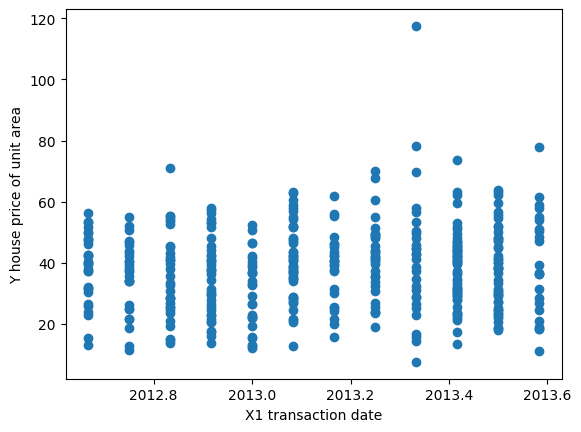

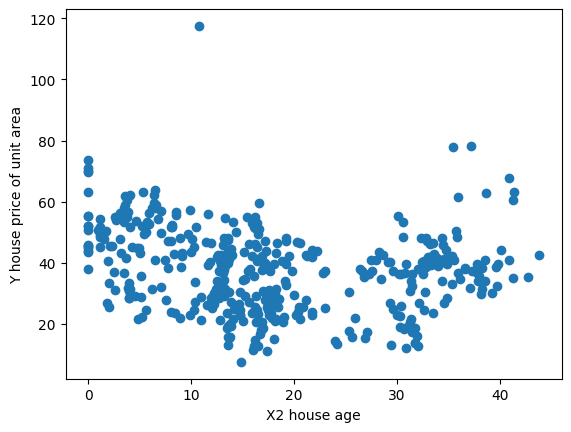

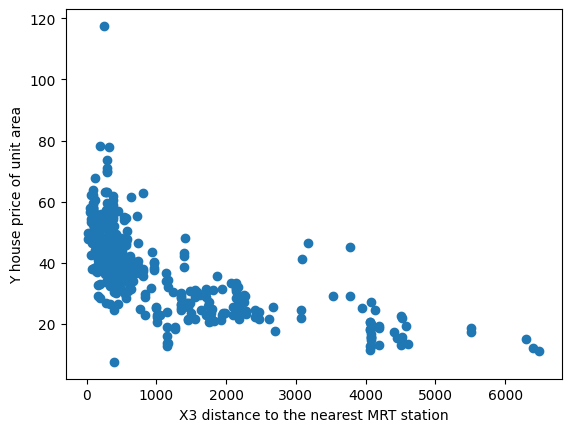

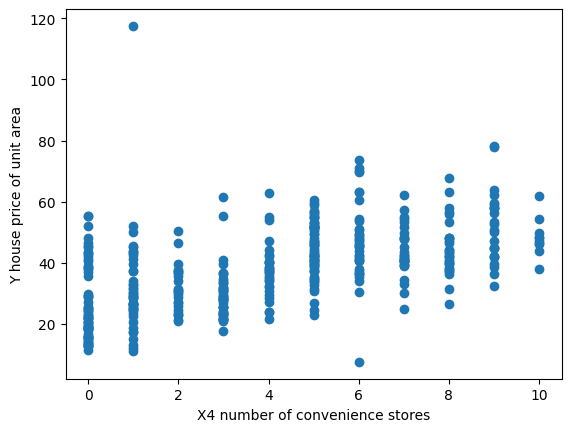

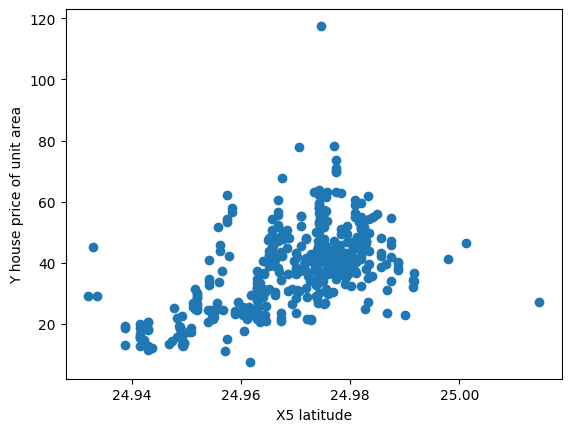

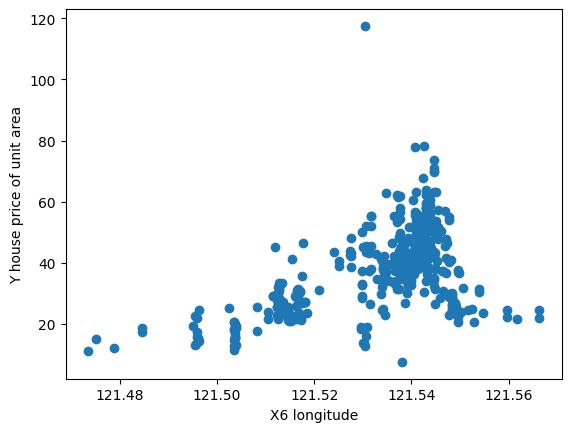

In [489]:
import matplotlib.pyplot as plt
target_column = 'Y house price of unit area'
for column in data.columns[1:-1]:
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

In [490]:
unwanted_columns = ['No']
data = data.drop(unwanted_columns, axis=1)

In [491]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [492]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [493]:
custom_linear_model = LinearRegression(learning_rate=0.3, epochs=3750, penalty=None, alpha=0)
custom_lasso_model = LinearRegression(learning_rate=0.05, epochs=50, penalty='L1', alpha=1.0)
custom_ridge_model = LinearRegression(learning_rate=0.3, epochs=2950, penalty='L2', alpha=1.0)
custom_linear_model.fit(X_train_scaled, y_train)
custom_lasso_model.fit(X_train_scaled, y_train)
custom_ridge_model.fit(X_train_scaled, y_train)
custom_linear_predictions = custom_linear_model.predict(X_test_scaled)
custom_lasso_predictions = custom_lasso_model.predict(X_test_scaled)
custom_ridge_predictions = custom_ridge_model.predict(X_test_scaled)

In [494]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

sklearn_linear_model = LinearRegression()
sklearn_lasso_model = Lasso(alpha=1.0)
sklearn_ridge_model = Ridge(alpha=1.0)
sklearn_linear_model.fit(X_train_scaled, y_train)
sklearn_lasso_model.fit(X_train_scaled, y_train)
sklearn_ridge_model.fit(X_train_scaled, y_train)
sklearn_linear_predictions = sklearn_linear_model.predict(X_test_scaled)
sklearn_lasso_predictions = sklearn_lasso_model.predict(X_test_scaled)
sklearn_ridge_predictions = sklearn_ridge_model.predict(X_test_scaled)

In [495]:
from sklearn.metrics import mean_squared_error, r2_score

custom_linear_mse = mean_squared_error(y_test, custom_linear_predictions)
custom_linear_r2 = r2_score(y_test, custom_linear_predictions)

custom_lasso_mse = mean_squared_error(y_test, custom_lasso_predictions)
custom_lasso_r2 = r2_score(y_test, custom_lasso_predictions)

custom_ridge_mse = mean_squared_error(y_test, custom_ridge_predictions)
custom_ridge_r2 = r2_score(y_test, custom_ridge_predictions)

sklearn_linear_mse = mean_squared_error(y_test, sklearn_linear_predictions)
sklearn_linear_r2 = r2_score(y_test, sklearn_linear_predictions)

sklearn_lasso_mse = mean_squared_error(y_test, sklearn_lasso_predictions)
sklearn_lasso_r2 = r2_score(y_test, sklearn_lasso_predictions)

sklearn_ridge_mse = mean_squared_error(y_test, sklearn_ridge_predictions)
sklearn_ridge_r2 = r2_score(y_test, sklearn_ridge_predictions)

print("Custom Linear Model - MSE:", custom_linear_mse)
print("Custom Linear Model - R2 Score:", custom_linear_r2)

print("Custom Lasso Model - MSE:", custom_lasso_mse)
print("Custom Lasso Model - R2 Score:", custom_lasso_r2)

print("Custom Ridge Model - MSE:", custom_ridge_mse)
print("Custom Ridge Model - R2 Score:", custom_ridge_r2)

print("Sklearn Linear Regression - MSE:", sklearn_linear_mse)
print("Sklearn Linear Regression - R2 Score:", sklearn_linear_r2)

print("Sklearn Lasso Regression - MSE:", sklearn_lasso_mse)
print("Sklearn Lasso Regression - R2 Score:", sklearn_lasso_r2)

print("Sklearn Ridge Regression - MSE:", sklearn_ridge_mse)
print("Sklearn Ridge Regression - R2 Score:", sklearn_ridge_r2)

Custom Linear Model - MSE: 55.58321586364157
Custom Linear Model - R2 Score: 0.6874728312319638
Custom Lasso Model - MSE: 99.8262757235591
Custom Lasso Model - R2 Score: 0.43870783948380754
Custom Ridge Model - MSE: 57.25880234631398
Custom Ridge Model - R2 Score: 0.6780515285721775
Sklearn Linear Regression - MSE: 55.60617460642829
Sklearn Linear Regression - R2 Score: 0.6873437413480821
Sklearn Lasso Regression - MSE: 109.19835203675449
Sklearn Lasso Regression - R2 Score: 0.3860115636363195
Sklearn Ridge Regression - MSE: 57.24386402395992
Sklearn Ridge Regression - R2 Score: 0.6781355221216495


In [509]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred_class = np.where(y_pred > 0.5, 1, 0)
        return y_pred_class.flatten()

data = load_breast_cancer()
X = data.data
y = data.target
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
custom_lr = LogisticRegression(learning_rate=0.1, epochs=1000)
custom_lr.fit(X_train, y_train)
custom_predictions = custom_lr.predict(X_test)
penalties = ['none', 'l1', 'l2']
for penalty in penalties:
    sklearn_lr = SklearnLogisticRegression(penalty=penalty, solver='saga', max_iter=1000)
    sklearn_lr.fit(X_train, y_train)
    sklearn_predictions = sklearn_lr.predict(X_test)
    accuracy = accuracy_score(y_test, sklearn_predictions)
    print(f"Accuracy score with penalty '{penalty}': {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score with penalty 'none': 0.9649122807017544
Accuracy score with penalty 'l1': 0.956140350877193
Accuracy score with penalty 'l2': 0.9824561403508771


In [513]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

custom_lr = LogisticRegression(learning_rate=0.1, epochs=1000)
custom_lr.fit(X_train, y_train)
custom_predictions = custom_lr.predict(X_test)

penalties = ['none', 'l1', 'l2']
best_custom_model = None
best_sklearn_model = None
best_custom_auc = 0
best_sklearn_auc = 0

for penalty in penalties:
    sklearn_lr = SklearnLogisticRegression(penalty=penalty, solver='saga', max_iter=1000)
    sklearn_lr.fit(X_train, y_train)
    sklearn_predictions = sklearn_lr.predict(X_test)
    
    custom_accuracy = accuracy_score(y_test, custom_predictions)
    sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
    
    if custom_accuracy > best_custom_auc:
        best_custom_model = custom_lr
        best_custom_auc = custom_accuracy
        
    if sklearn_accuracy > best_sklearn_auc:
        best_sklearn_model = sklearn_lr
        best_sklearn_auc = sklearn_accuracy

print("Custom Logistic Regression:")
print("Classification Report:")
print(classification_report(y_test, best_custom_model.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_custom_model.predict(X_test)))

print("Scikit-Learn Logistic Regression:")
print("Classification Report:")
print(classification_report(y_test, best_sklearn_model.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_sklearn_model.predict(X_test)))

# # Calculate roc_auc_score and plot roc curves for the best custom model
# custom_roc_auc = roc_auc_score(y_test, best_custom_model.predict_proba(X_test)[:, 1])
# custom_fpr, custom_tpr, _ = roc_curve(y_test, best_custom_model.predict_proba(X_test)[:, 1])
# plt.plot(custom_fpr, custom_tpr, label='Custom Logistic Regression (AUC = %0.2f)' % custom_roc_auc)

# # Calculate roc_auc_score and plot roc curves for the best scikit-learn model
# sklearn_roc_auc = roc_auc_score(y_test, best_sklearn_model.predict_proba(X_test)[:, 1])
# sklearn_fpr, sklearn_tpr, _ = roc_curve(y_test, best_sklearn_model.predict_proba(X_test)[:, 1])
# plt.plot(sklearn_fpr, sklearn_tpr, label='Scikit-Learn Logistic Regression (AUC = %0.2f)' % sklearn_roc_auc)

# # Plot settings
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Custom Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[39  4]
 [ 1 70]]
Scikit-Learn Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[41  2]
 [ 0 71]]


In [514]:
# Question 4

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [516]:
glass_data = pd.read_csv("glass.csv")

In [517]:
X = glass_data.iloc[:, 1:-1]
Y = glass_data['Type']

In [518]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [519]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [520]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [521]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [522]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [523]:
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy (KNN, k=3):", accuracy)

Accuracy (KNN, k=3): 0.5581395348837209


In [ ]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, Y_train)
Y_pred_sklearn = sklearn_knn.predict(X_test)
accuracy_sklearn = accuracy_score(Y_test, Y_pred_sklearn)
print("Accuracy (sklearn KNN, k=3):", accuracy_sklearn)

In [525]:
max_depths = range(5, 11)
accuracies_dt = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
    accuracies_dt.append(accuracy_dt)
    print("Accuracy (Decision Tree, max_depth={}):".format(max_depth), accuracy_dt)

Accuracy (Decision Tree, max_depth=5): 0.5348837209302325
Accuracy (Decision Tree, max_depth=6): 0.5813953488372093
Accuracy (Decision Tree, max_depth=7): 0.6046511627906976
Accuracy (Decision Tree, max_depth=8): 0.6046511627906976
Accuracy (Decision Tree, max_depth=9): 0.5813953488372093
Accuracy (Decision Tree, max_depth=10): 0.5348837209302325


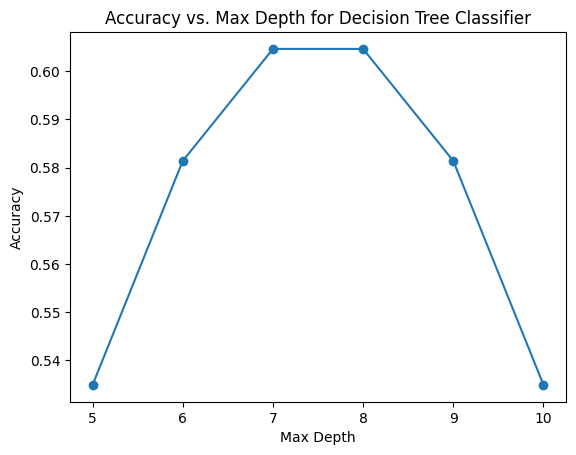

In [526]:
plt.plot(max_depths, accuracies_dt, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Max Depth for Decision Tree Classifier")
plt.show()

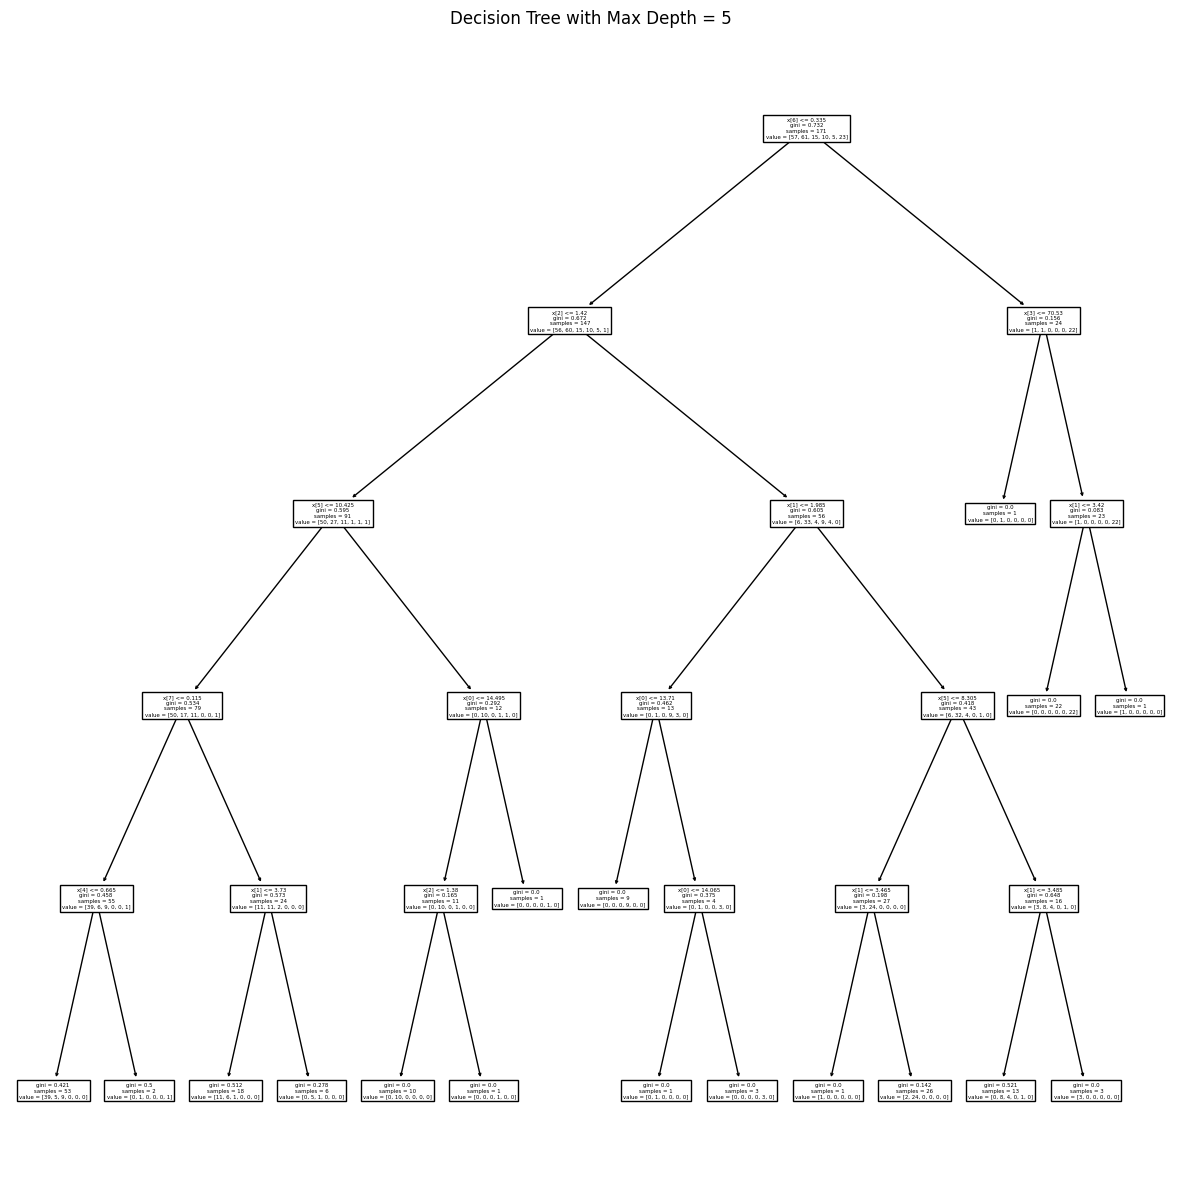

In [529]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=dt)
plt.title("Decision Tree with Max Depth = 5")
plt.show()